In [51]:
import numpy as np 
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

In [52]:
df = pd.read_csv("Covid_19.csv")

In [53]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [55]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [56]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [57]:
df.describe(include=['O']).T

,count,unique,top,freq
Country/Region,187,187,Afghanistan,1
WHO Region,187,6,Europe,56


In [58]:
df.rename(columns={"New cases (k$)": "Active", "New recovered (1-100)": "Recovered"}, inplace=True)

# Data Visualization

<AxesSubplot: xlabel='Active', ylabel='Recovered'>

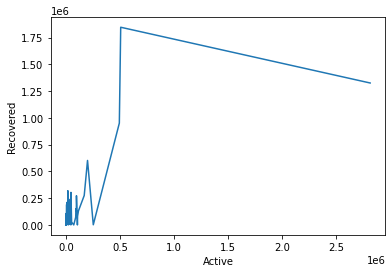

In [59]:
sns.lineplot(x='Active',y='Recovered', data=df)

In [60]:
df['New deaths'].unique()

array([  10,    6,    8,    0,    1,  120,   37,    4,   64,   14,  614,
          7,   11,   75,  508,    3,    2,   20,   17,   46,    5,   27,
         50,  637,   57,  212,   96,   16,   24,  342,   13,    9,   28,
        575,   19,   85,  298, 1076], dtype=int64)

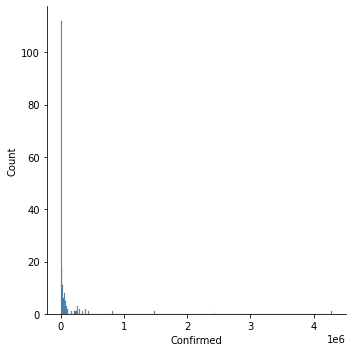

In [61]:
sns.displot(x='Confirmed', data=df, kde=False)

<AxesSubplot: xlabel='Deaths', ylabel='New deaths'>

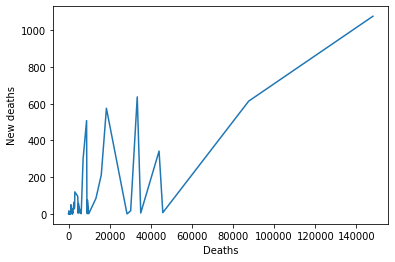

In [62]:
sns.lineplot(x='Deaths',y='New deaths', data=df)

<AxesSubplot: xlabel='Country/Region', ylabel='count'>

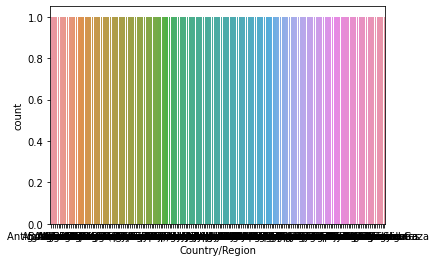

In [63]:
sns.countplot(x='Country/Region', data=df)

In [64]:
df['Country/Region'].value_counts()

Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: Country/Region, Length: 187, dtype: int64

# Data Correlation

<AxesSubplot: >

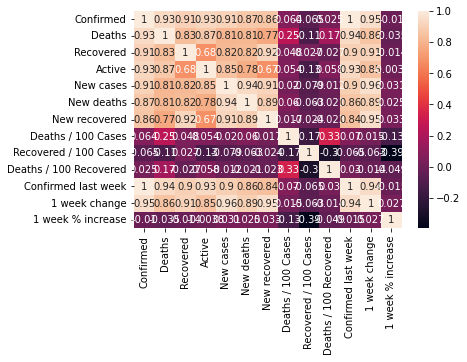

In [65]:
sns.heatmap(df.corr(), annot=True)

In [66]:
df.drop('Recovered', axis=1, inplace=True)

In [67]:
df.head()

,Country/Region,Confirmed,Deaths,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [68]:
df = pd.get_dummies(df).reset_index(drop=True)

# K-Means Clustering

In [69]:
X = df.iloc[:,[0,2]].values

In [70]:
print(X)

[[  36263    9796]
 [   4880    1991]
 [  27973    7973]
 [    907      52]
 [    950     667]
 [     86      18]
 [ 167416   91782]
 [  37390   10014]
 [  15303    5825]
 [  20558    1599]
 [  30446    6781]
 [    382     280]
 [  39482    3231]
 [ 226225   97577]
 [    110       9]
 [  67251    6221]
 [  66428   39154]
 [     48      20]
 [   1770     699]
 [     99      13]
 [  71181   47056]
 [  10498    5274]
 [    739     674]
 [2442375  508116]
 [    141       0]
 [  10621    4689]
 [   1100     121]
 [    350      52]
 [    378      76]
 [   2328     756]
 [    226      79]
 [  17110    2180]
 [ 116458  107514]
 [   4599    2994]
 [    922      37]
 [ 347923   18782]
 [  86783    3258]
 [ 257101  117163]
 [    354      19]
 [   3200    2317]
 [   8844    2936]
 [  15841   11902]
 [  15655    5198]
 [   4881     806]
 [   2532      94]
 [   1060     189]
 [  15516    3715]
 [  13761     543]
 [   5059      24]
 [     18       0]
 [  64156   32869]
 [  81161   40733]
 [  92482   

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.p

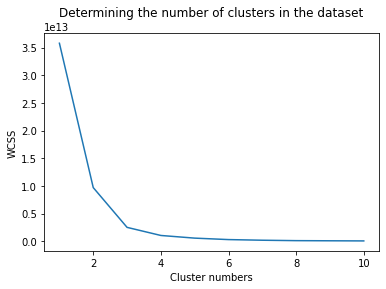

In [71]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Determining the number of clusters in the dataset')
plt.xlabel('Cluster numbers')
plt.ylabel('WCSS')
plt.show()

In [72]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
print(y_kmeans)

[3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 0 3
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3
 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1 3 3 3 0 3 3 3 3 3 3 3
 3 3]


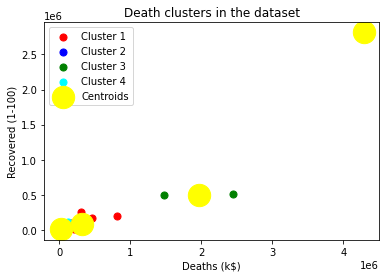

In [74]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
##plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 500, c = 'yellow', label = 'Centroids')
plt.title('Death clusters in the dataset')
plt.xlabel('Deaths (k$)')
plt.ylabel('Recovered (1-100)')
plt.legend()
plt.show()

# Hierarchical clustering

In [75]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [76]:
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0]


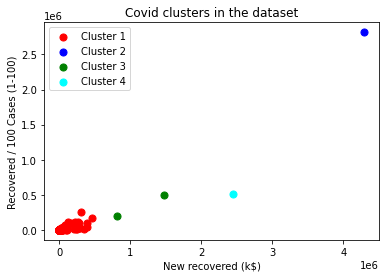

In [77]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
##plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Covid clusters in the dataset')
plt.xlabel('New recovered (k$)')
plt.ylabel('Recovered / 100 Cases (1-100)')
plt.legend()
plt.show()

In [78]:
df['kmeans Cluster'] = y_kmeans
df.head()

,Confirmed,Deaths,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,...,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,kmeans Cluster
0,36263,1269,9796,106,10,18,3.50,69.49,5.04,35526,...,0,0,0,0,0,1,0,0,0,3
1,4880,144,1991,117,6,63,2.95,56.25,5.25,4171,...,0,0,0,0,0,0,1,0,0,3
2,27973,1163,7973,616,8,749,4.16,67.34,6.17,23691,...,0,0,0,1,0,0,0,0,0,3
3,907,52,52,10,0,0,5.73,88.53,6.48,884,...,0,0,0,0,0,0,1,0,0,3
4,950,41,667,18,1,0,4.32,25.47,16.94,749,...,0,0,0,1,0,0,0,0,0,3


In [79]:
df['Hierarchical Cluster'] = y_hc
df.head()

,Confirmed,Deaths,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,...,Country/Region_Zambia,Country/Region_Zimbabwe,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,kmeans Cluster,Hierarchical Cluster
0,36263,1269,9796,106,10,18,3.50,69.49,5.04,35526,...,0,0,0,0,1,0,0,0,3,0
1,4880,144,1991,117,6,63,2.95,56.25,5.25,4171,...,0,0,0,0,0,1,0,0,3,0
2,27973,1163,7973,616,8,749,4.16,67.34,6.17,23691,...,0,0,1,0,0,0,0,0,3,0
3,907,52,52,10,0,0,5.73,88.53,6.48,884,...,0,0,0,0,0,1,0,0,3,0
4,950,41,667,18,1,0,4.32,25.47,16.94,749,...,0,0,1,0,0,0,0,0,3,0


In [80]:
df['Hierarchical Cluster'] = df['Hierarchical Cluster'].replace([3],30)
df['Hierarchical Cluster'] = df['Hierarchical Cluster'].replace([1],3)
df['Hierarchical Cluster'] = df['Hierarchical Cluster'].replace([30],1)
df.head()

,Confirmed,Deaths,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,...,Country/Region_Zambia,Country/Region_Zimbabwe,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,kmeans Cluster,Hierarchical Cluster
0,36263,1269,9796,106,10,18,3.50,69.49,5.04,35526,...,0,0,0,0,1,0,0,0,3,0
1,4880,144,1991,117,6,63,2.95,56.25,5.25,4171,...,0,0,0,0,0,1,0,0,3,0
2,27973,1163,7973,616,8,749,4.16,67.34,6.17,23691,...,0,0,1,0,0,0,0,0,3,0
3,907,52,52,10,0,0,5.73,88.53,6.48,884,...,0,0,0,0,0,1,0,0,3,0
4,950,41,667,18,1,0,4.32,25.47,16.94,749,...,0,0,1,0,0,0,0,0,3,0


In [81]:
df['kmeans Cluster'].equals(['Hierarchical Cluster'])

False